# Plot vapor pressures from the CRC handbook, download 220323.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

def p_sat(T1, T2, P1, H_vap):
    R=8.3145
    P2 = P1*np.exp((-H_vap/R*(1/T2-1/T1)))
    return P2

def get_H(T1, T2, P1, P2):
    R=8.3145
    H_vap = -np.log(P2/P1)*R/((1/T2-1/T1))
    return H_vap
    

In [2]:
dir = "../data/external/CHEMPHYSHB_T1/"
list_d = pd.DataFrame()
for file in os.listdir(dir):
    if 'csv' in file: 
        list_d = pd.concat([list_d, pd.read_csv(dir+'/'+file)])
a = ['Name', 'Mol. form.', 1,
       10, 100,
       1000, 10000,
       100000, 'Ref.', 'NaN']
list_d.columns = a
list_old = list_d = list_d.copy(deep=True)

for col in [1, 10, 100, 1000, 10000, 100000]:
    list_d[col] = list_d[col].astype('str').map(lambda x: x.lstrip('<').rstrip('<sup>e</sup>'))
    list_d[col] = list_d[col].astype('str').map(lambda x: x.lstrip('<').rstrip('<sup>d</sup>'))
    list_d[col] = list_d[col].astype('str').map(lambda x: x.lstrip('<').rstrip('<sup>c</sup>'))
    list_d[col] = list_d[col].astype('str').map(lambda x: x.lstrip('<').rstrip('<sup>b</sup>'))
    list_d[col] = list_d[col].astype('str').map(lambda x: x.lstrip('<').rstrip('<sup>a</sup>'))
    list_d[col] = list_d[col].astype('float')
list_d['hvap'] = get_H(list_d[1000]+273,list_d[100000]+273, 1000, 100000)
list_d['T 298 K (in Pa)'] = p_sat(list_d[10000]+273, 298, 10000, list_d['hvap'])
list_d['T 298 K (in log10 mBar)'] = list_d['T 298 K (in Pa)']/10**2

In [3]:
GeckoQ = pd.read_csv('../data/external/GeckoQ/Dataframe.csv')
GeckoQ['pSat_mbar'] = GeckoQ['pSat_Pa']/10**2

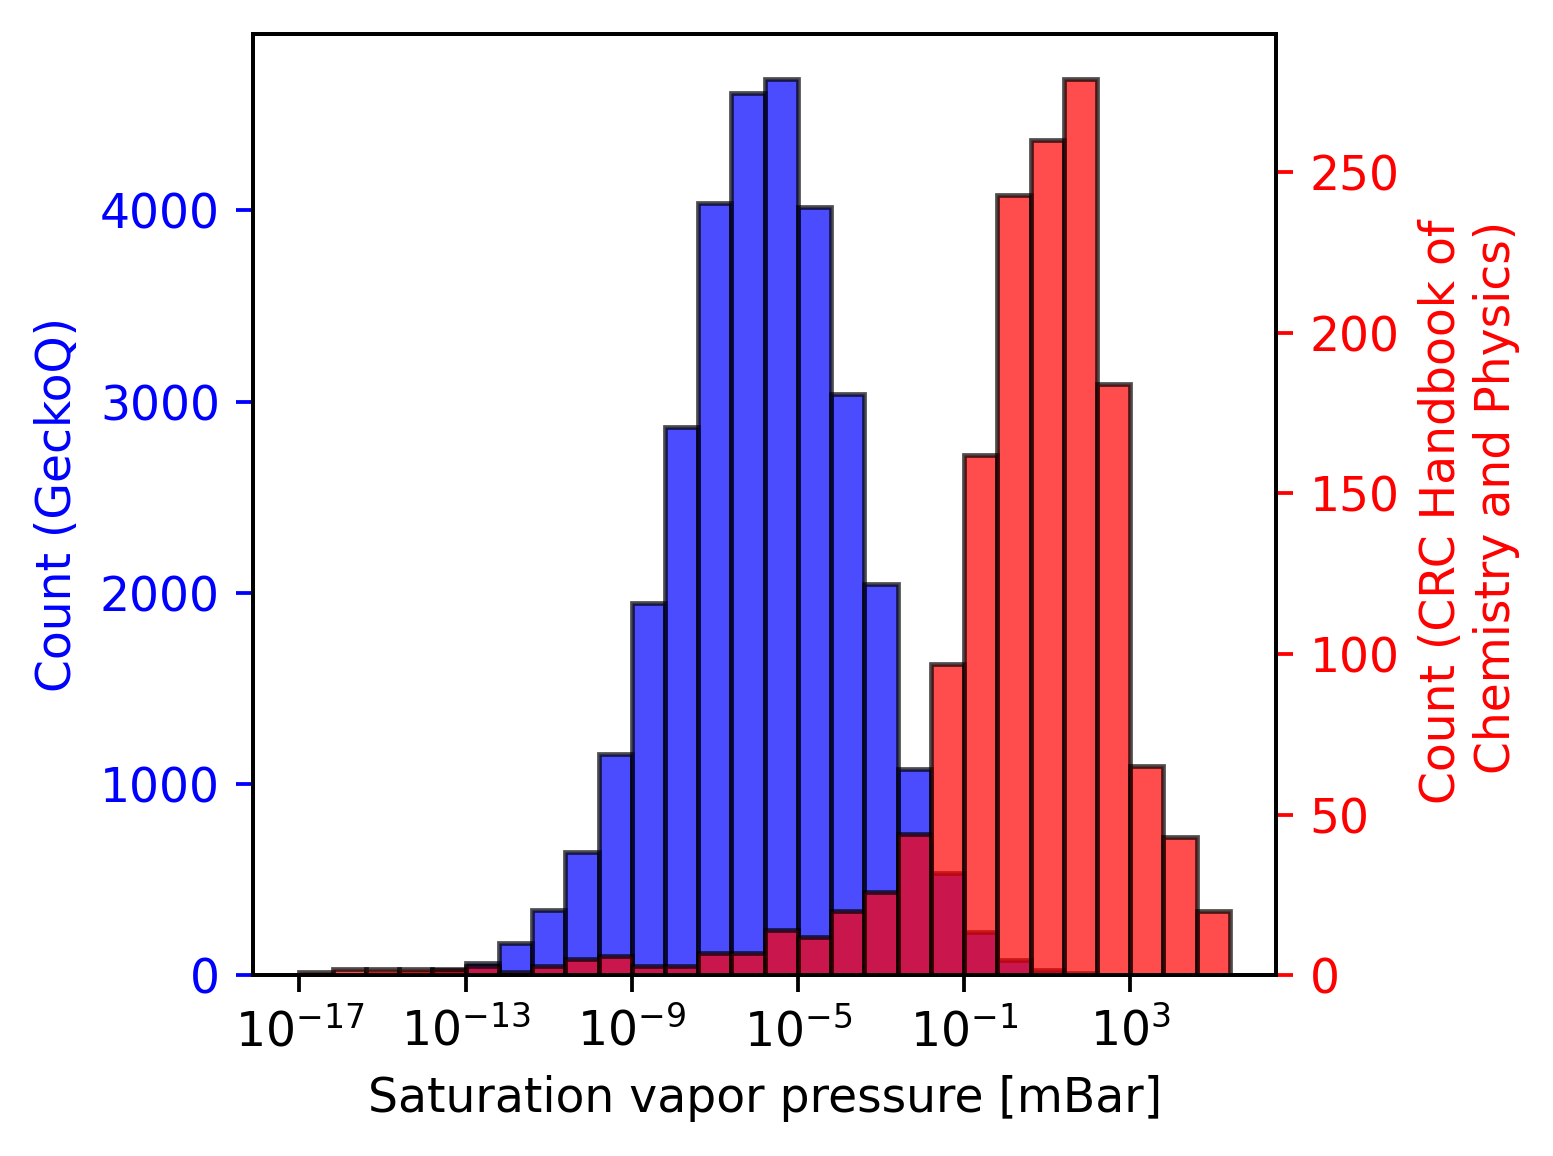

In [14]:
fig, ax1 = plt.subplots(figsize=(4.67,3.5),dpi=340)
plt.rc('font', size=10)
sns.set_palette(sns.color_palette("bright"))
# Plot the first histogram on the left y-axis

ax1.hist(np.log10(GeckoQ['pSat_mbar']), bins=np.arange(-17, 6, 0.8), ec='k',  color='blue', alpha=0.7)
ax1.set_xlabel('Saturation vapor pressure [mBar]')
ax1.set_ylabel('Count (GeckoQ)', color='blue')
ax1.tick_params('y', colors='blue')



# Create a twin Axes sharing the xaxis
ax2 = ax1.twinx()

# Plot the second histogram on the right y-axis
ax2.hist(np.log10(list_d['T 298 K (in log10 mBar)']), bins=np.arange(-17, 6, 0.8), ec='k', color='red', alpha=0.7)
ax2.set_ylabel('Count (CRC Handbook of \n Chemistry and Physics)', color='red')
ax2.tick_params('y', colors='red')


ax1.set_xticks(ticks=[-17, -13, -9,-5, -1, 3], labels=[r"$10^{-17}$",r"$10^{-13}$", r"$10^{-9}$", r"$10^{-5}$", r"$10^{-1}$",r"$10^{3}$"])

# Adjust layout
plt.tight_layout()

plt.savefig('../reports/figures/physchemhb.png',dpi=340, transparent=True)

In [ ]:
#E. O. Whittier and S. P. Gould
#Sucrose vapor pressure, https://pubs.acs.org/doi/pdf/10.1021/ie50241a022
p_mmhg = 18.39
mbar_per_mmhg = 1.33322368 
p_mbar = p_mmhg*mbar_per_mmhg 
log_p_mbar = np.log10(p_mbar)
log_p_mbar

In [ ]:
#mercury: https://www.researchgate.net/figure/apor-pressure-of-elemental-mercury-as-a-function-of-temperature-Notes-1-Pascal-98710_fig4_264934878
#0.261 Pa (2.58×10 −6 atm) at 25°C.
p_pa = 0.261
mbar_per_pa = 0.01
p_mbar = p_pa*mbar_per_pa
log_p_mbar = np.log10(p_mbar)
log_p_mbar